# Nonlinear Decision Boundaries
Load the data in `data.csv` as a data frame.

In [1]:
# creation of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# get data between -pi and pi
dat = np.linspace(-np.pi,np.pi,100)
# transform by sine and cosine
datx = 0.4 * np.sin(dat) + np.random.normal(scale = 0.03,size=len(dat))
daty = 0.4 * np.cos(dat) + np.random.normal(scale = 0.03,size=len(dat))

datx2 = 0.6 * np.sin(dat) + np.random.normal(scale = 0.03,size=len(dat))
daty2 = 0.6 * np.cos(dat) + np.random.normal(scale = 0.03,size=len(dat))

# plot and save the resulting data
#plt.plot(datx,daty,'o')
df1 = pd.DataFrame({'x':datx,'y':daty,'c':np.repeat(["A"],100)})
df1
df2 = pd.DataFrame({'x':datx2,'y':daty2,'c':np.repeat(["B"],100)})
df2

df = pd.concat([df1,df2],sort=False)
df
#df.to_csv("data.csv",index=False)

,x,y,c
0,0.051920,-0.378874,A
1,-0.077194,-0.391871,A
2,-0.083993,-0.418196,A
3,-0.112411,-0.355540,A
4,-0.126714,-0.417728,A
...,...,...,...
95,0.184146,-0.572692,B
96,0.095896,-0.573366,B
97,0.060812,-0.652355,B
98,0.047930,-0.594220,B


Plot the data with matplotlib as a 2D scatter plot, using different colors for the different classes. 

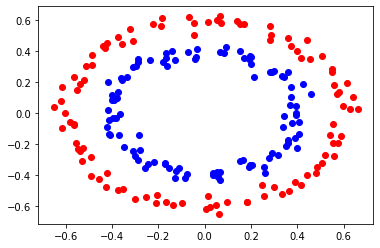

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


plt.plot(df.loc[df.c == "A",'x'],df.loc[df.c == "A",'y'],'bo')
plt.plot(df.loc[df.c == "B",'x'],df.loc[df.c == "B",'y'],'ro')

Which non-linear transformation $\phi$ will lead linearly separable data in the $\phi$-space? Compute this transformation, and plot the transformed data.

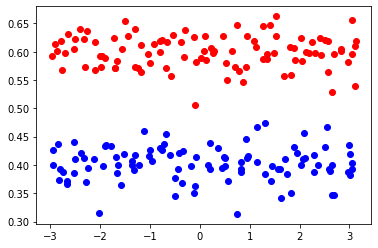

In [3]:
df["trans"] = np.arctan2(df.x,df.y)
df["trans2"] = np.sqrt(np.square(df.x)+np.square(df.y))
df
plt.plot(df.loc[df.c == "A",'trans'],df.loc[df.c == "A",'trans2'],'bo')
plt.plot(df.loc[df.c == "B",'trans'],df.loc[df.c == "B",'trans2'],'ro')

# Kernel Density Estimators

In the lecture, you got to know kernel density estimatiors as a non-parametric method for representing a distribution. They represent the distribution of values $x$ as follows:

\begin{equation}
p(t) = \frac{1}{n \, h} \sum_{i=1}^n \varphi\left(\frac{t-x_i}{h}\right)
\end{equation}
Here,  $\varphi$ is a windowing function, e.g. the Gauss window:
\begin{equation}
\varphi(u) = \frac{1}{\sqrt{2\pi}} e^{-u^2/2}
\end{equation}

## Exercise 1
Implement the function `kde(t,h,x)` that estimates the kernel density estimate $p(t)$, given a point $t$, a window size $h$ and an array of training samples $x$.

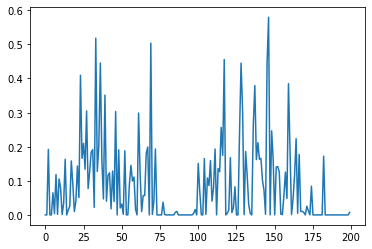

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def kde(t,h,x):
    n = len(x)
    insum = [k1((t-xj)/h) for xj in x]
    return 1/(n*h) * sum(insum)

def k1(t):
    return 1/math.sqrt(2*math.pi) * math.exp(-1/2 * t**2)

example = np.concatenate((np.random.normal(0,1,100),np.random.normal(5,1,100)))

dens = [kde(t,0.01,example) for t in np.arange(-2,8,0.05)]

plt.plot(dens)

## Exercise 2

Implement the function `classify_kde(xnew,x,classes)` that performs a classification with a kernel density estimator. Specifically, this is a Bayes classifier where the likelihood is represented by a kernel density estimator.

In [8]:
import pandas as pd
from scipy.io import arff

def classify_kde(xnew,x,classes):
    uclasses = np.unique(classes)
    def getDens(c):
        xt = x[classes == c]
        return kde(xnew,0.01,xt)
    dens = np.array([getDens(c) for c in uclasses])
    prior = np.array([sum(classes == c)/len(classes) for c in uclasses])
    return uclasses[np.argmax(dens * prior)]

data = arff.loadarff('features1.arff')
df = pd.DataFrame(data[0])
feat = df["AccX_mean"]
cl = df["class"]

p = [classify_kde(x,feat,cl) for x in feat]
np.mean(p == cl)

0.96045197740113